# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 95% R로 분석 다시보기-2-treat-4-선형대수기초 대응분석관련-7 (47일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 범주형 변수의 관계 찾기 -- treat - 대응분석 정리

## 진료과목 중 내과만 자세히 살피기  -- 대응분석

## 대응분석 관련 정리 계속

대응분석을 설명하기 위해서는 몇가지 기본적인 내용의 정리가 필요합니다. 따라서 관련 내용을 먼저 정리 하고 진료 과목에 대한 대응 분석을 설명할 예정입니다.
여기서 대응분석이라는 것은 일반적으로 두개의 범주형 변수의 관계에 대한 독립성 여부는 카이제곱 분석에 의하여 P 검정을 살펴보게 됩니다.

그러나 다수준인 경우에는 분석시에 복잡한 양상을 띄게 됩니다. 따라서 이 경우에는 수준별 대응 분석을 하게 됩니다. 대응분석은 범주형 변수의 각 수준을 계량화하여 2차원 그래프 상에서 표현하여 두 범주형 변수가 변화는 관계를 살펴보는 것입니다.

이런 내용을 이해 하기 위해서는 선형 대수와 관련 해서 몇가지 기초적인 지식이 필요합니다.

이번에는 PCA 결과 분석 관련 다양한 그래프 표현에 관련해서 설명을 하고 다음에 왜 고유값, 고유벡터를 해야하는지 이유를 설명하겠습니다. 실은 고유벡터는 공분산, 분산과 관련이 있습니다.

### PCA 분석 기초 (http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

PCA 를 이해하기 위해서는 선형대수의 고유값에 대한 이해가 필요합니다. 그러나 여기서는 깊은 이야기 보다는 직관적으로 이해를 돕도록 설명하고자 합니다.아래 Plot 1A 산점도는 이전 예와 같은 방식으로 차수 축소로 2개의 PCA 로 표시 하였습니다. PCA 는 가장 큰 분산이 가장 중요하다고 생각합니다. 즉 가장 주축 (most principal).  
  
Plot 1A 에서 보면, PC1 축이 제1 주축 (first principal direction) 이고, PC2 축이 제2추축 이 됩니다. PC1 과 PC2 는 서로 직교입니다. 2차원 데이터는 각 샘플 점 에서 제1 주축으로 Projection 하므로써 그림 Plot 1B 가 됩니다. 각 분산에 의해서 나타나는 분산은 고유값이 됩니다. 이 부분은 내일 설명 할 예정입니다. 

<table>
  <tr>
    <th><img src="006-principal-component-analysis-scatter-plot-data-mining-1.png" width="240" alt="" /></th>
    <th><img src="006-principal-component-analysis-scatter-plot-data-mining-2.png" width="240" alt="" /></th>
  </tr> 
</table>

PCA는 특히 매우 큰 상관관계 (correlated) 가 있을 때 매우 유용합니다. 지금은 이정도로 설명하고 다음날 이런 개념에 대해서 설명할 예정입니다.

PCA 분석을 위해서 먼저 두개의 Package 를 설치합니다.

In [97]:
#install.packages(c("FactoMineR", "factoextra"))

In [98]:
# 라이브러리 설정
library("FactoMineR")
library("factoextra")

설명 예제로서 factoextra package 에 있는 10종 경기를 사용 할 것입니다.

In [99]:
data(decathlon2)

In [100]:
decathlon2

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m,Rank,Points,Competition
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.70,1,8217,Decastar
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.50,2,8122,Decastar
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.10,4,8067,Decastar
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.40,5,8036,Decastar
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.00,7,8004,Decastar
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.10,8,7995,Decastar
MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.10,9,7802,Decastar
HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.10,10,7733,Decastar
BARRAS,11.33,6.97,14.09,1.95,49.48,14.48,42.10,4.72,55.40,282.00,11,7708,Decastar
NOOL,11.33,7.27,12.68,1.98,49.20,15.29,37.92,4.62,57.44,266.60,12,7651,Decastar


In [101]:
str(decathlon2)

'data.frame':	27 obs. of  13 variables:
 $ X100m       : num  11 10.8 11 11.3 11.1 ...
 $ Long.jump   : num  7.58 7.4 7.23 7.09 7.3 7.31 6.81 7.56 6.97 7.27 ...
 $ Shot.put    : num  14.8 14.3 14.2 15.2 13.5 ...
 $ High.jump   : num  2.07 1.86 1.92 2.1 2.01 2.13 1.95 1.86 1.95 1.98 ...
 $ X400m       : num  49.8 49.4 48.9 50.4 48.6 ...
 $ X110m.hurdle: num  14.7 14.1 15 15.3 14.2 ...
 $ Discus      : num  43.8 50.7 40.9 46.3 45.7 ...
 $ Pole.vault  : num  5.02 4.92 5.32 4.72 4.42 4.42 4.92 4.82 4.72 4.62 ...
 $ Javeline    : num  63.2 60.1 62.8 63.4 55.4 ...
 $ X1500m      : num  292 302 280 276 268 ...
 $ Rank        : int  1 2 4 5 7 8 9 10 11 12 ...
 $ Points      : int  8217 8122 8067 8036 8004 7995 7802 7733 7708 7651 ...
 $ Competition : Factor w/ 2 levels "Decastar","OlympicG": 1 1 1 1 1 1 1 1 1 1 ...


데이터는 2004년 올림픽과 2004년 Decastar 의 27명 선수 기록입니다.
* row 1:23  까지 자료를 PCA 분석을 하는데 사용할 것입니다.
* row 24:27 자료는 PCA 분석으로 얻어진 자료를 이용하여 예측하는데 사용할 예정입니다.
* col 1:10  PCA 분석으로 사용
* col 11:12 포인트와 순위 기록은 예측에 사용 할 것입니다.


# Let's go

In [102]:
decathlon2.active = decathlon2[1:23, 1:10]
str(decathlon2.active)

'data.frame':	23 obs. of  10 variables:
 $ X100m       : num  11 10.8 11 11.3 11.1 ...
 $ Long.jump   : num  7.58 7.4 7.23 7.09 7.3 7.31 6.81 7.56 6.97 7.27 ...
 $ Shot.put    : num  14.8 14.3 14.2 15.2 13.5 ...
 $ High.jump   : num  2.07 1.86 1.92 2.1 2.01 2.13 1.95 1.86 1.95 1.98 ...
 $ X400m       : num  49.8 49.4 48.9 50.4 48.6 ...
 $ X110m.hurdle: num  14.7 14.1 15 15.3 14.2 ...
 $ Discus      : num  43.8 50.7 40.9 46.3 45.7 ...
 $ Pole.vault  : num  5.02 4.92 5.32 4.72 4.42 4.42 4.92 4.82 4.72 4.62 ...
 $ Javeline    : num  63.2 60.1 62.8 63.4 55.4 ...
 $ X1500m      : num  292 302 280 276 268 ...


In [103]:
head(decathlon2.active)

,X100m,Long.jump,Shot.put,High.jump,X400m,X110m.hurdle,Discus,Pole.vault,Javeline,X1500m
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4
ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0
McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1


데이터를 비교 하기 위해서 모든 자료를 표준화 하여야 합니다. 이것은 다음과 같은 방식으로 진행 합니다.
$$
\dfrac{x_i - mean(x)}{sd(x)}
$$

참조: FactoMineR 에서 표준화는 자동으로 하므로 표준화 작업을 할 필요는 없습니다.

PCA(X, scale.unit = TRUE, ncp = 5, graph = TRUE)  
X: data frame  
scale.unut: TRUE 면 표준화 로 변환  
ncp:  최종 결과에서 나타날 차원  
graph : TRUE 면 최종으로 그래프 표시  

전날 분석 작업에는 prcomp() 함수를 사용했습니다.


In [104]:
# 라이브러리 지정
library(FactoMineR)

In [105]:
# PCA 분석을 시행합니다.
res.pca = PCA(decathlon2.active, graph = FALSE)

In [106]:
# 결과 를 출력해 봅니다. 
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 23 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

## PCA 결과 해석 및 그래프

PCA 분석에는 여러 패키지가 있습니다. stats::prcomp(), FactoMiner::PCA(), ade4::dudi.pca(), ExPosition::epPCA() 전날에는 prcomp() 를 사용했고 이번에는 PCA() 를 사용했습니다. 어떤 PCA 패키지를 사용하던, 결과를 뽑아서 factorextra R 패키지를 이용하여 그래프를 표현 할 수 있습니다.

### 주성분 (Principal Component = Eigen Value/Variance) 

고유값은 주성분의 분산정도를 표시합니다. 따라서 분산정도가 큰값 즉 고유값이 큰값 순서로 주성분을 정합니다.  먼저 고유값을 출력해 봅니다.

In [107]:
# 라이브러리를 선택합니다.
library(factoextra)

In [108]:
# 고유값을 출력합니다.
eig.val = get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,4.1242133,41.242133,41.24213
Dim.2,1.8385309,18.385309,59.62744
Dim.3,1.2391403,12.391403,72.01885
Dim.4,0.8194402,8.194402,80.21325
Dim.5,0.7015528,7.015528,87.22878
Dim.6,0.4228828,4.228828,91.45760
Dim.7,0.3025817,3.025817,94.48342
Dim.8,0.2744700,2.744700,97.22812
Dim.9,0.1552169,1.552169,98.78029
Dim.10,0.1219710,1.219710,100.00000


모두 10개의 고유값이 나왔습니다. 누적기여율을 보면, 처음이 41.24% 이고, 그다음까지는 59.62% 입니다. 이제 어디 까지 선택을 하여야 할 지 선택을 하여야 합니다. 고유값은 어디까지 주성분을 선택하여야 할 지를 알려 줍니다.  

그러나 어디 까지 선택하여야 할지에 대한 일반적인 규칙은 아직 없으며, 영역에 맞게 적절하게 선택을 하여야 합니다.    

이번 예제 에서는 72% 를 컷 오프로 하여 선택합니다. 이것은 일반적으로 많아 사용합니다.  

또 다른 방법은 Screen Plot 을 이용하는 이용합니다. Screen Plot 은 고유값을 큰것부터 순서대로 막대그래프로 표현합니다.  

이전에는 plot 을 이용하여 표현하였으니 여기선 fviz_eig() 나 또는 fivz_screenplot() 를 이용합니다. 대체적으로 5번쩨에서 cut-off 합니다.

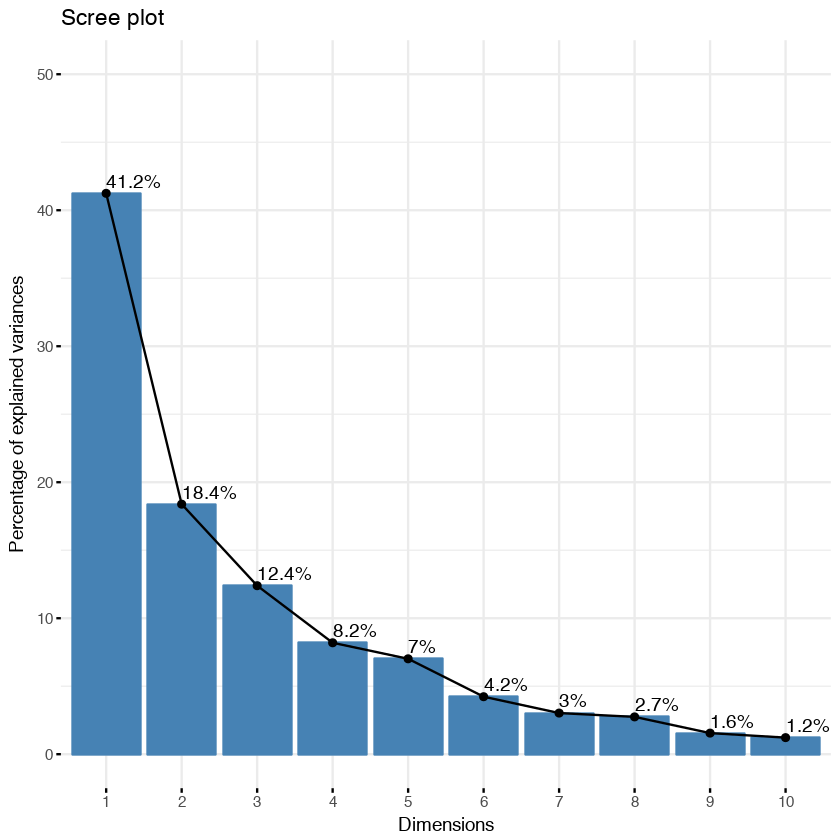

In [109]:
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0,50))

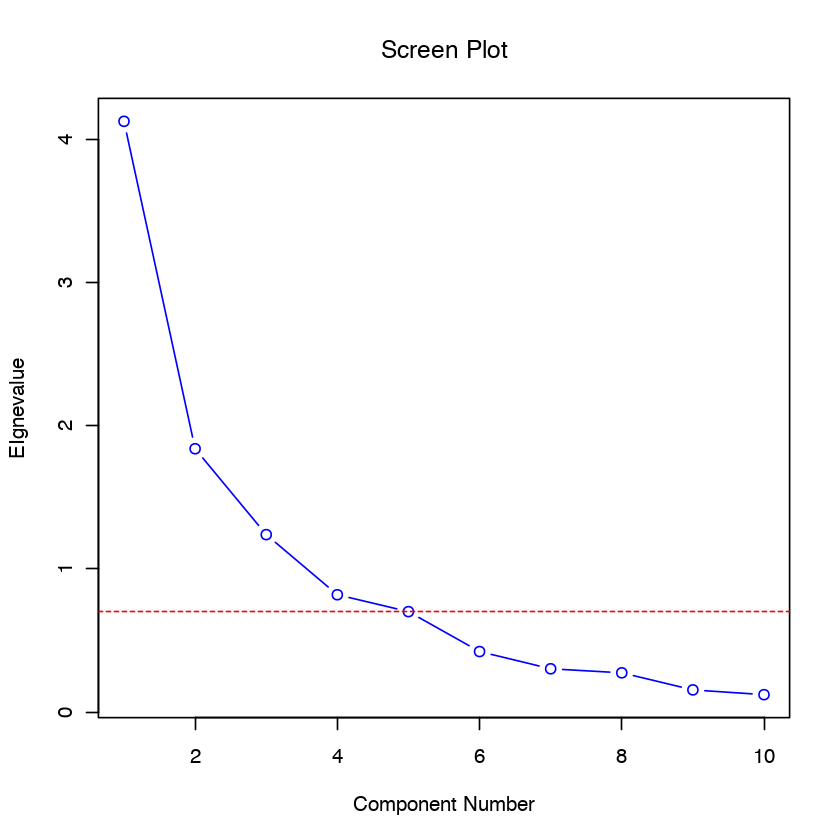

In [110]:
x <- 1:dim(eig.val)[1]
plot(x, eig.val[,1], type = 'b', col='blue', ylab="EIgnevalue", xlab = "Component Number", main="Screen Plot", sub=NULL)
abline(h = 0.7, lty = 2, col = "red")

누적 기여율이 87% 되는 5개의 PC 축을 선택하도록 합니다.

### 변수들의 그래프

##### 결과

* 지표는 두가지가 있습니다. 하나는 변수로 종목을 나타냅니다. 그리고 또다른 하나는 개인별 기록입니다. 이들 각각을 여기서는 변수와 개인 으로 구분합니다.
* 먼저 종목별 변수에 대해서 분석하고 다음에는 개인을 분석합니다.
* 종목별 변수를 가져오는 함수는 get_pac_var() 입니다.

결과를 가져오는 간단한 방법은 get_pac_var() 함수를 이용합니다.

In [111]:
var = get_pca_var(res.pca)
print(var)

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               


* **var\$coord** : 산점도를 그리기 위한 변수
* **var\$cos2** : var.coord \* var.coord
* **var\$contrib** : 주성분 축에 기여하는 변수의 퍼센트 기여도. 

In [112]:
# 값을 살펴보면
head(var$coord)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.03357320,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.11538956,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.12846837,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.14455012,0.4027002
X400m,-0.7016034,0.29017826,0.2835329,0.43082552,0.1039085
X110m.hurdle,-0.7641252,-0.02474081,0.4488873,-0.01689589,0.2242200


In [113]:
head(var$cos2)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.0321836641,0.09093628,0.0011271597,0.03780845
Long.jump,0.6307229,0.0788806285,0.03630798,0.0133147506,0.05436203
Shot.put,0.5386279,0.0072938636,0.26790749,0.0165041211,0.06190783
High.jump,0.3722025,0.2164242070,0.10895622,0.0208947375,0.16216747
X400m,0.4922473,0.0842034209,0.08039091,0.1856106269,0.01079698
X110m.hurdle,0.5838873,0.0006121077,0.20149984,0.0002854712,0.05027463


In [114]:
head(var$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.13755240,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.62485936,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.01407269,8.824401
High.jump,9.024811,11.7715838,8.792888,2.54987951,23.115504
X400m,11.935544,4.5799296,6.487636,22.65090599,1.539012
X110m.hurdle,14.157544,0.0332933,16.261261,0.03483735,7.166193


### 상관도 원 (Correlation circle)

PC(principal component) 와 변수 사이의 상관관계.

In [115]:
head(var$coord, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,-0.8506257,-0.17939806,0.3015564,0.0335732,-0.1944440
Long.jump,0.7941806,0.28085695,-0.1905465,-0.1153896,0.2331567
Shot.put,0.7339127,0.08540412,0.5175978,0.1284684,-0.2488129
High.jump,0.6100840,-0.46521415,0.3300852,0.1445501,0.4027002


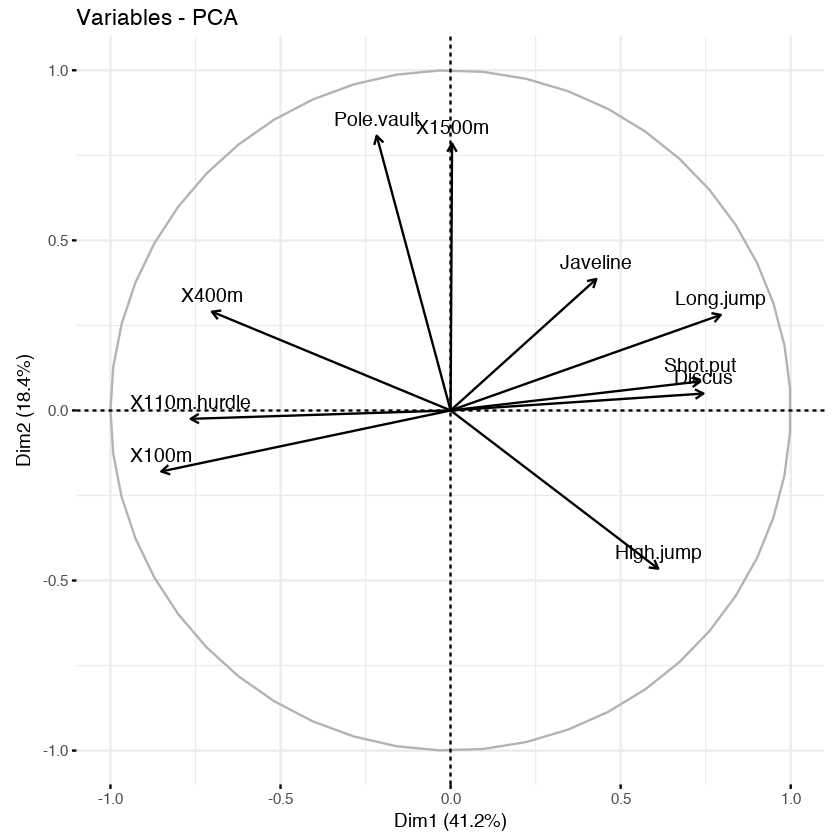

In [116]:
# 그래프는 다음과 같다.
fviz_pca_var(res.pca, cor.var="black")

* 

위 그림은 변수의 상관관계 로서 표시 합니다. 모든 변수들의 관계는 다음과 같이 해석됩니다.
* 같은 사변에 또는 같은 방향으로 되어 있는 종목은 양의 상관관계입니다. 즉 400m 와 100 m 는 같은 양의 상관관계입니다.
* 반대 방향으로 되어 있는 변수들은 음의 상관관계 입니다. 100 m 와 long.junp 는 음의 상관관계입니다.
* 원점에서 변수 까지의 길이는 factor (주축의) 의 기여도를 나타납니다. 원점에서 먼 변수가 주축을 가장 잘 나타냅니다.

#### 주축에 대한 성분값 (Quality of representation)

주축에 대한 성분값은
 cos2(square cosine, squared coordinates) 로 나타냅니다. 이들의 값은 다음과 같습니다.

In [117]:
head(var$cos2, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,0.7235641,0.032183664,0.09093628,0.00112716,0.03780845
Long.jump,0.6307229,0.078880629,0.03630798,0.01331475,0.05436203
Shot.put,0.5386279,0.007293864,0.26790749,0.01650412,0.06190783
High.jump,0.3722025,0.216424207,0.10895622,0.02089474,0.16216747


그래프로 표현 하면 다음과 같습니다.

In [118]:
 library(corrplot)

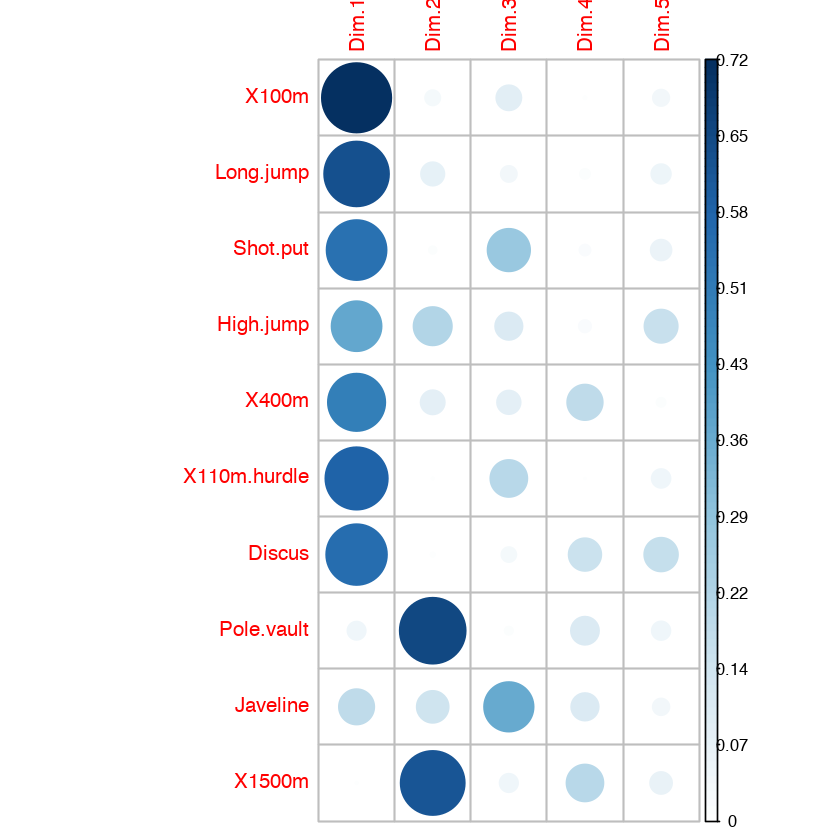

In [119]:
corrplot(var$cos2, is.corr = FALSE)

fviz_cos2() 함수를 이용하면 bar plot 를 볼 수 있습니다.

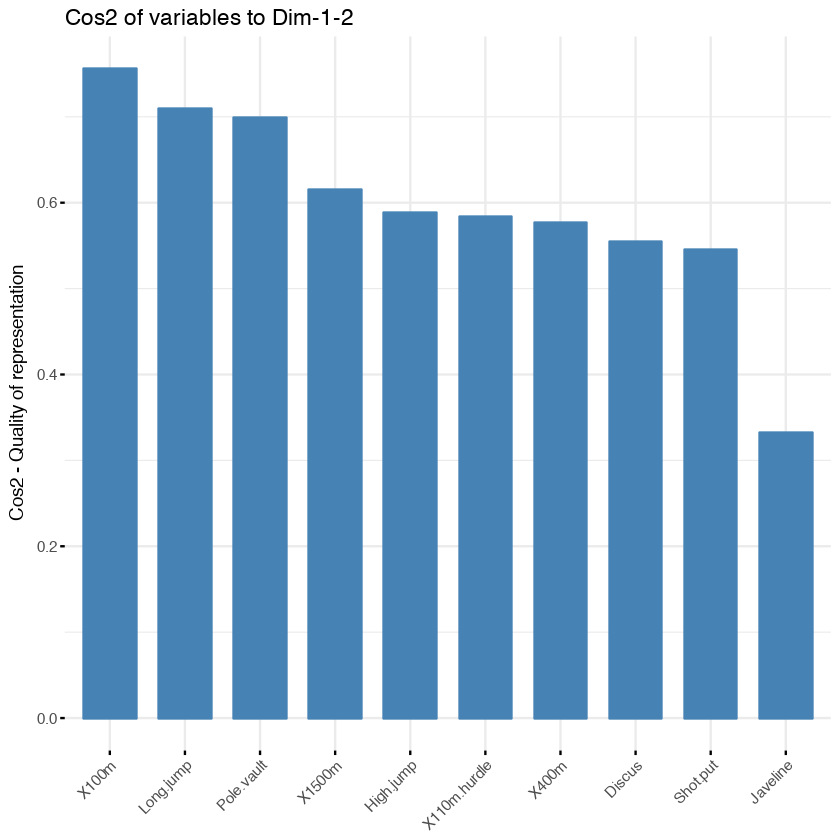

In [120]:
# Dim.1, Dim.2 변수의 cos2
fviz_cos2(res.pca, choice="var", axes = 1:2)

* 가장 큰 cos2 값이 주축 dim.1 dim.2 에 가장 기여도가 큰 변수입니다.
* 반대로 가장 낮은 cos2 가 PC (주축에서 낮은 기여도를 나타내고 앞의 원 그림에서 중심에 가깝게 있게 됩니다.

* 함수 fviz_var 에서 cos2 값을 변수로 하여 표현 할 수 있을 수 도 있습니다. 색깔도 cos2 값에 따라서 점진적으로 표현 할 수도 있습니다.

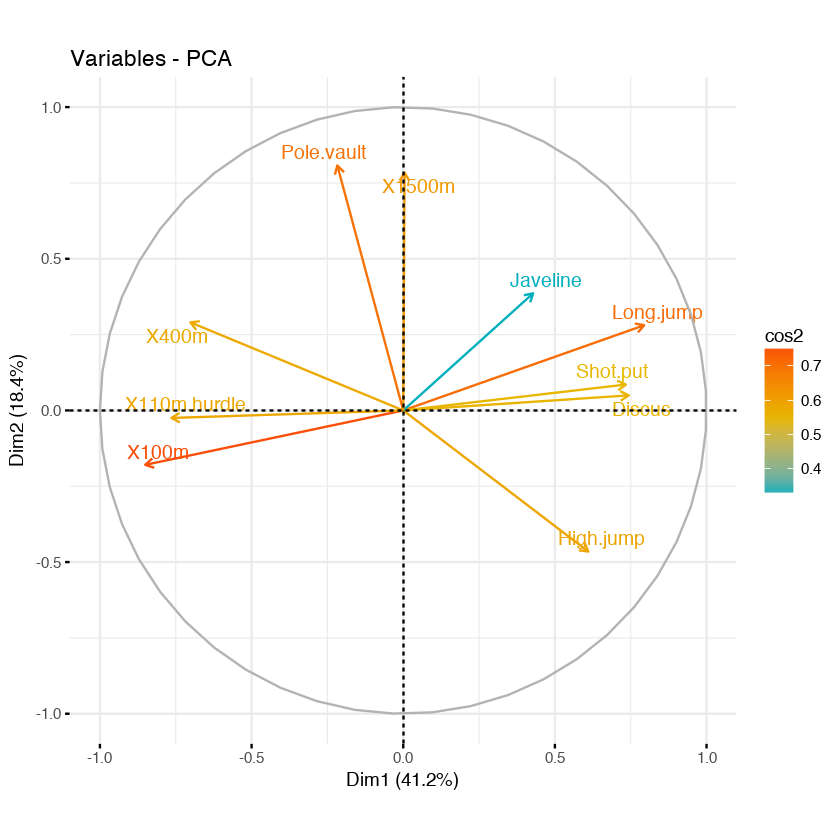

In [121]:
# Color by cos2 values: quality on the factor map
# 상관도원에서 단일 색상대신에 cos2 값으로 다르게 표현하면 하나의 그래프 상에 2가지 정보를 표현 할 수 있습니다.
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

alpha.var = "cos2" 로 설정하면 화살표를 투명도로 표현 할 수 있습니다.

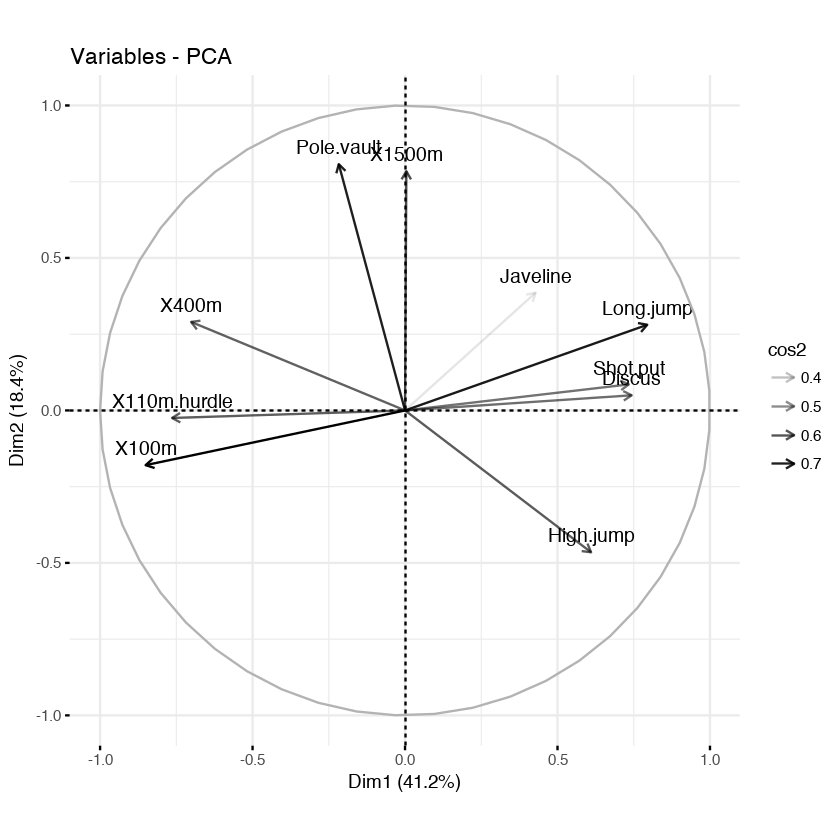

In [122]:
# Change the transparency by cos2 values
fviz_pca_var(res.pca, alpha.var = "cos2")

#### 주축에 대한 기여도

* 기여도는 각 주축에 대한 상관도를 나타냅니다.

In [123]:
# 기여도는 contrib 입니다.
head(var$contrib, 4)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
X100m,17.544293,1.7505098,7.338659,0.1375524,5.389252
Long.jump,15.293168,4.2904162,2.930094,1.6248594,7.748815
Shot.put,13.060137,0.3967224,21.620432,2.0140727,8.824401
High.jump,9.024811,11.7715838,8.792888,2.5498795,23.115504


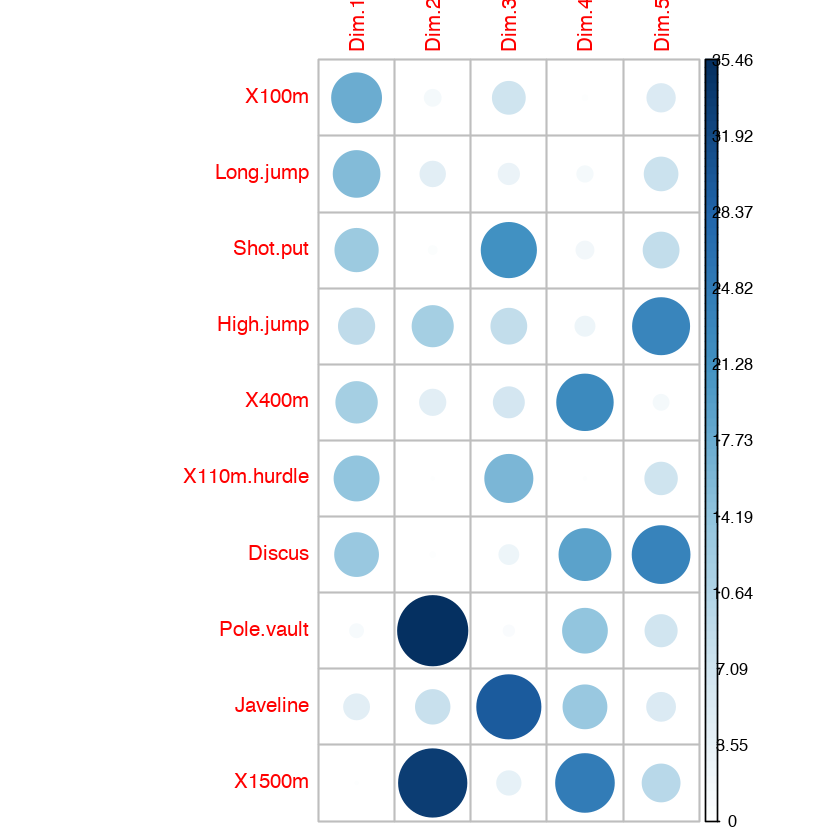

In [124]:
# 마찬가지로 corrplot() 표현 가능합니다.
library(corrplot)
corrplot(var$contrib, is.corr=FALSE)

바 챠트는 fviz_contrib() 로 표현 합니다.

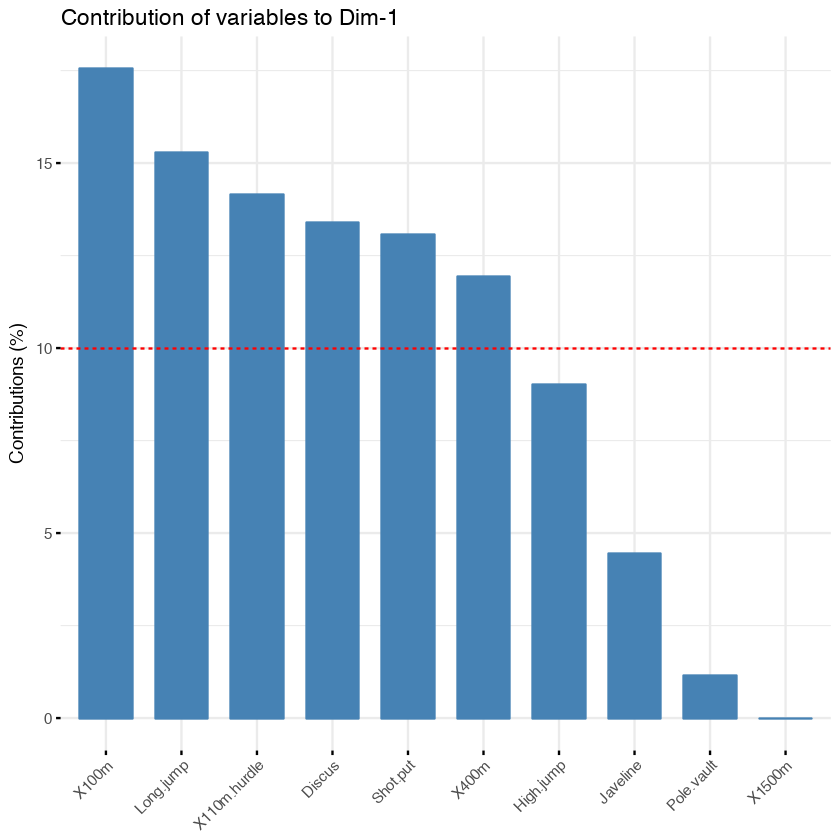

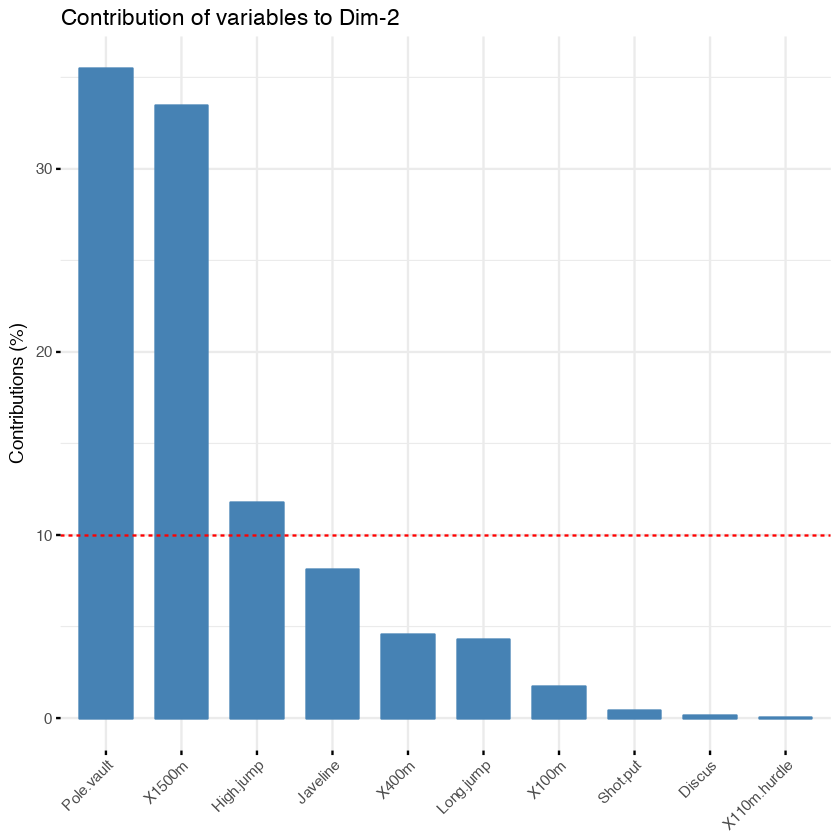

In [125]:
par(mfrow = c(2, 2))
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)

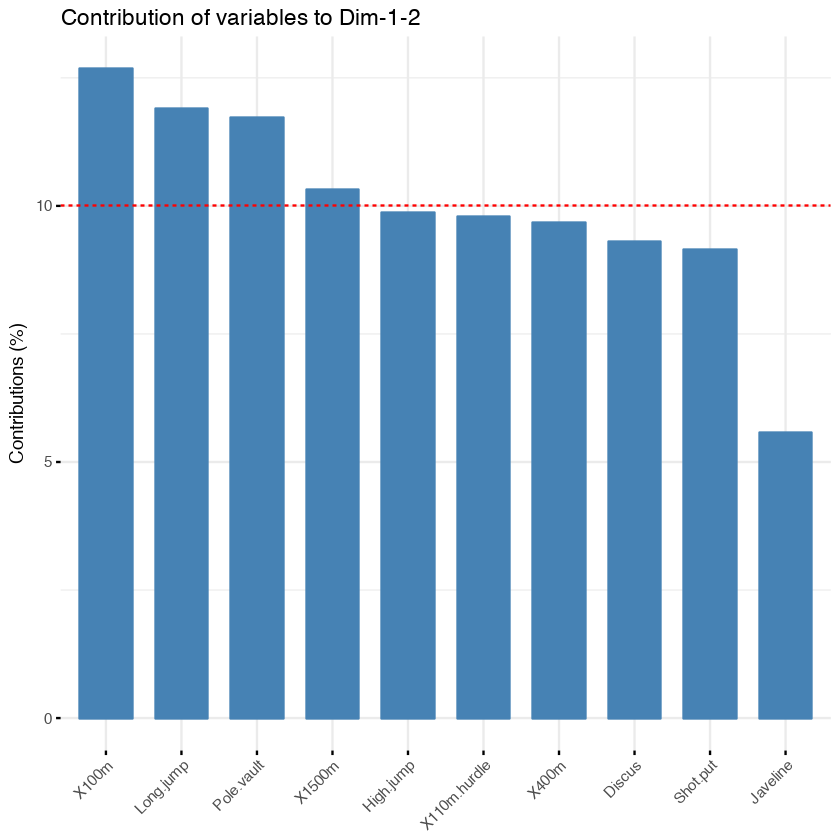

In [126]:
# pc1, pc2 에 대한 전체 공헌도는 다음과 같습니다.
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)

상관관계도 원 에 역시 contribute 별로 색깔을 구분하여 넣을 수 있습니다.

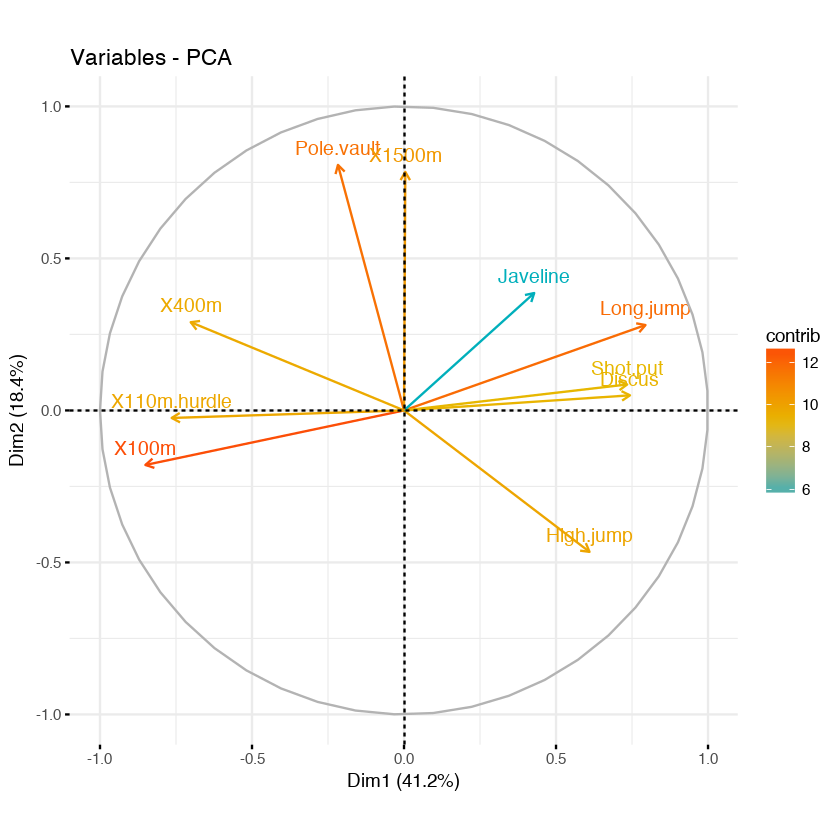

In [127]:
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )

상관관계도 원을 임의적으로 사용자가 변경하여 사용할 수 도 있습니다.

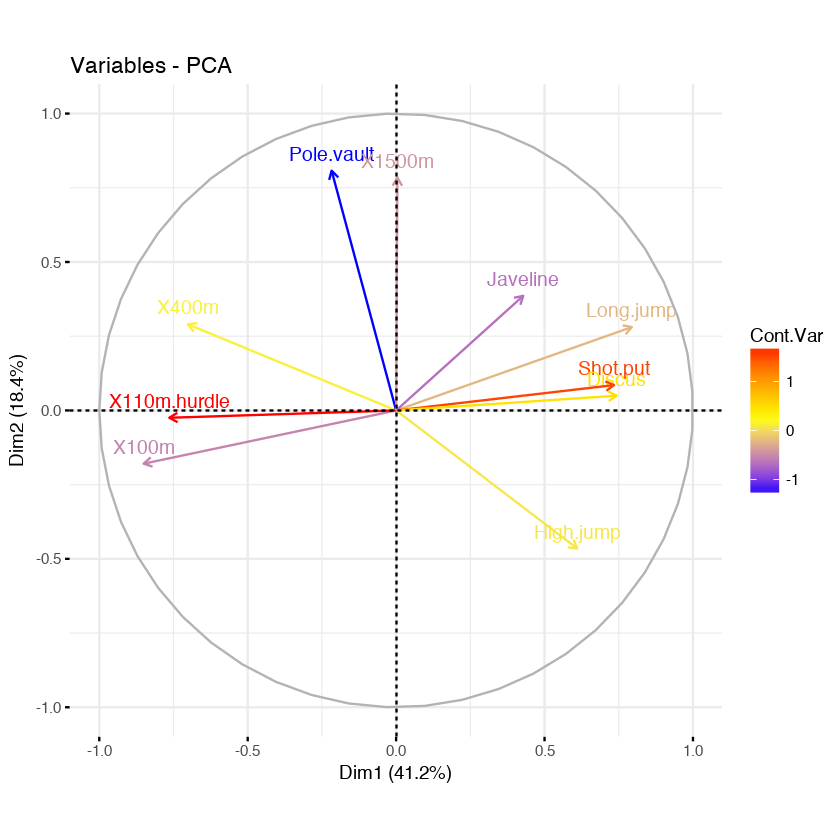

In [128]:
# Create a random continuous variable of length 10
set.seed(123)
my.cont.var <- rnorm(10)
# Color variables by the continuous variable
fviz_pca_var(res.pca, col.var = my.cont.var,
             gradient.cols = c("blue", "yellow", "red"),
             legend.title = "Cont.Var")

### 구룹멸 색상 정하기

* 10종경기에는 구분을 지정하기 위한 범주형 변수가 없습니다. 따라서 임의적으로 clustering 하여 같은 구룹끼리 구룹을 만들고 거기에 색깔을 입히겠습니다.
* clustering 은 단순한 kmeans 방법으로 합니다.

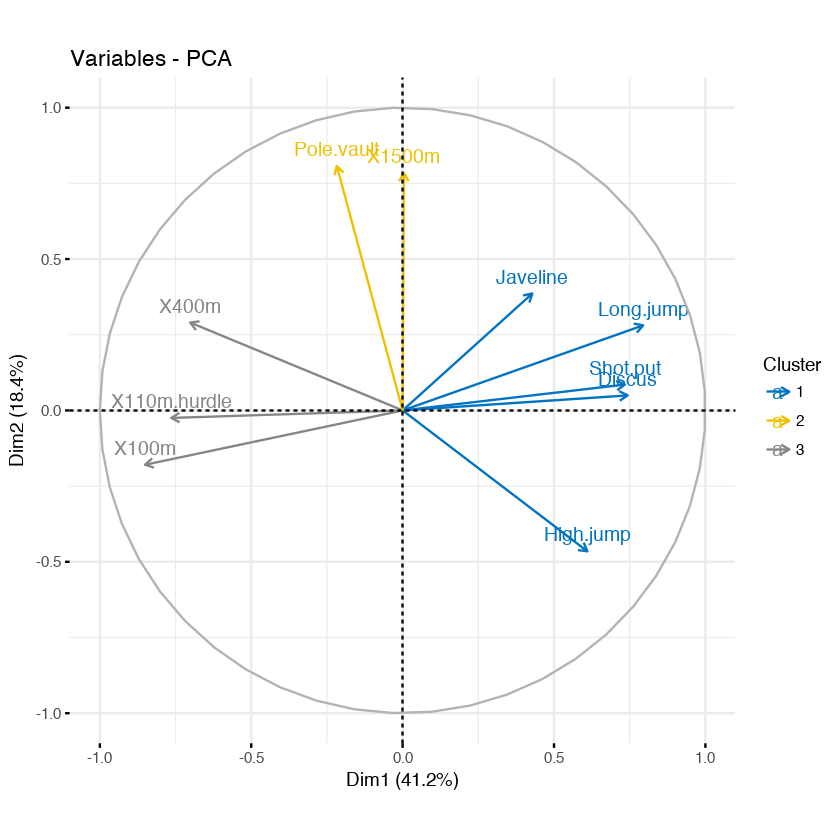

In [129]:
# Create a grouping variable using kmeans
# Create 3 groups of variables (centers = 3)
set.seed(123)
res.km <- kmeans(var$coord, centers = 3, nstart = 25)
grp <- as.factor(res.km$cluster)
# Color variables by groups
fviz_pca_var(res.pca, col.var = grp, 
             palette = c("#0073C2FF", "#EFC000FF", "#868686FF"),
             legend.title = "Cluster")

### 주축에 대한 설명


In [130]:
# p값 유의 수준은 0.05 로 합니다.
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1

,correlation,p.value
Long.jump,0.7941806,6.059893e-06
Discus,0.7432090,4.842563e-05
Shot.put,0.7339127,6.723102e-05
High.jump,0.6100840,1.993677e-03
Javeline,0.4282266,4.149192e-02
X400m,-0.7016034,1.910387e-04
X110m.hurdle,-0.7641252,2.195812e-05
X100m,-0.8506257,2.727129e-07


In [131]:
# Description of dimension 2
res.desc$Dim.2

,correlation,p.value
Pole.vault,0.8074511,3.205016e-06
X1500m,0.7844802,9.384747e-06
High.jump,-0.4652142,2.529390e-02


### 지금 부터는 개별 개인별 분석입니다.

개인별 자료른 get_pca_ind() 입니다. 이전에 get_pca_var() 하고 구분하시기 바랍니다.

In [132]:
ind = get_pca_ind(res.pca)
ind

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

In [133]:
# 각각의 변수 접근은 다음과 같습니다.
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
head(ind$contrib)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.1955047,1.5890567,0.6424912,0.08389652,1.16829387
CLAY,0.8078795,2.4748137,-1.3873827,1.29838232,-0.82498206
BERNARD,-1.3591340,1.6480950,0.2005584,-1.96409420,0.08419345
YURKOV,-0.8889532,-0.4426067,2.5295843,0.71290837,0.40782264
ZSIVOCZKY,-0.1081216,-2.0688377,-1.3342591,-0.10152796,-0.20145217
McMULLEN,0.1212195,-1.0139102,-0.8625170,1.34164291,1.62151286


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.007530179,0.49747323,0.081325232,0.001386688,0.2689026575
CLAY,0.048701249,0.45701660,0.143628117,0.125791741,0.0507850580
BERNARD,0.197199804,0.28996555,0.004294015,0.411819183,0.0007567259
YURKOV,0.096109800,0.02382571,0.778230322,0.061812637,0.0202279796
ZSIVOCZKY,0.001574385,0.57641944,0.239754152,0.001388216,0.0054654972
McMULLEN,0.002175437,0.15219499,0.110137872,0.266486530,0.3892621478


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
SEBRLE,0.04029447,5.9714533,1.4483919,0.03734589,8.45894063
CLAY,0.68805664,14.4839248,6.7537381,8.94458283,4.21794385
BERNARD,1.94740183,6.4234107,0.1411345,20.46819433,0.04393073
YURKOV,0.83308415,0.4632733,22.4517396,2.69663605,1.03075263
ZSIVOCZKY,0.01232413,10.1217143,6.2464325,0.05469230,0.25151025
McMULLEN,0.01549089,2.4310854,2.6102794,9.55055888,16.29493304


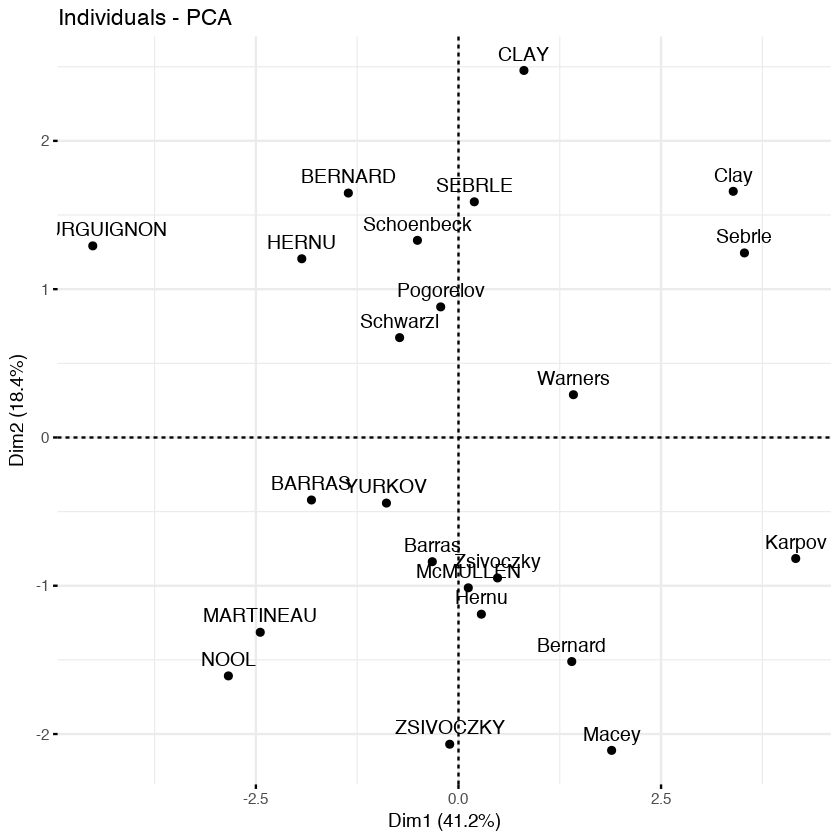

In [134]:
# fviz_pca_var 처럼 표시합니다.
fviz_pca_ind(res.pca)

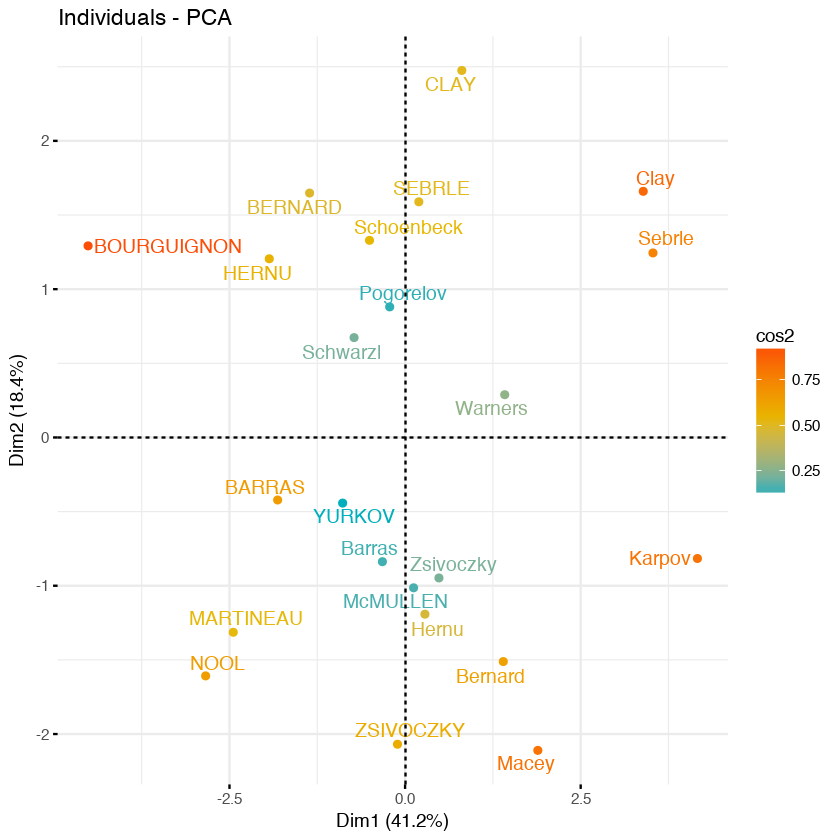

In [135]:
# cos2 에 대한 그래프는 다음과 같습니다.
fviz_pca_ind(res.pca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

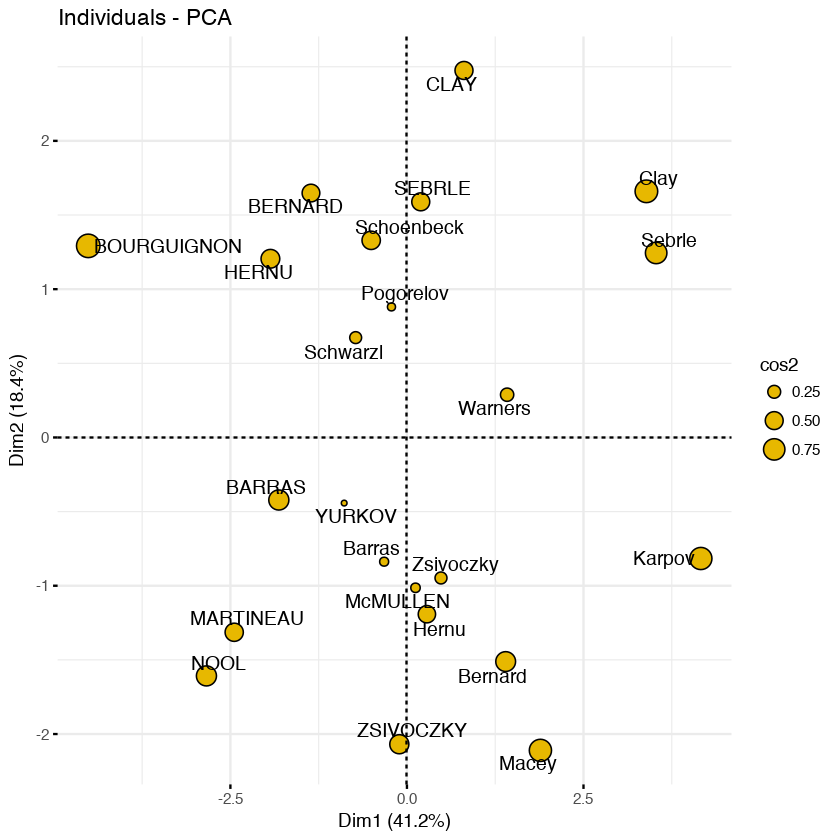

In [136]:
# cos2 의 값에 따라 원의 크기를 다르게 할 수 있습니다.
fviz_pca_ind(res.pca, pointsize = "cos2", 
             pointshape = 21, fill = "#E7B800",
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

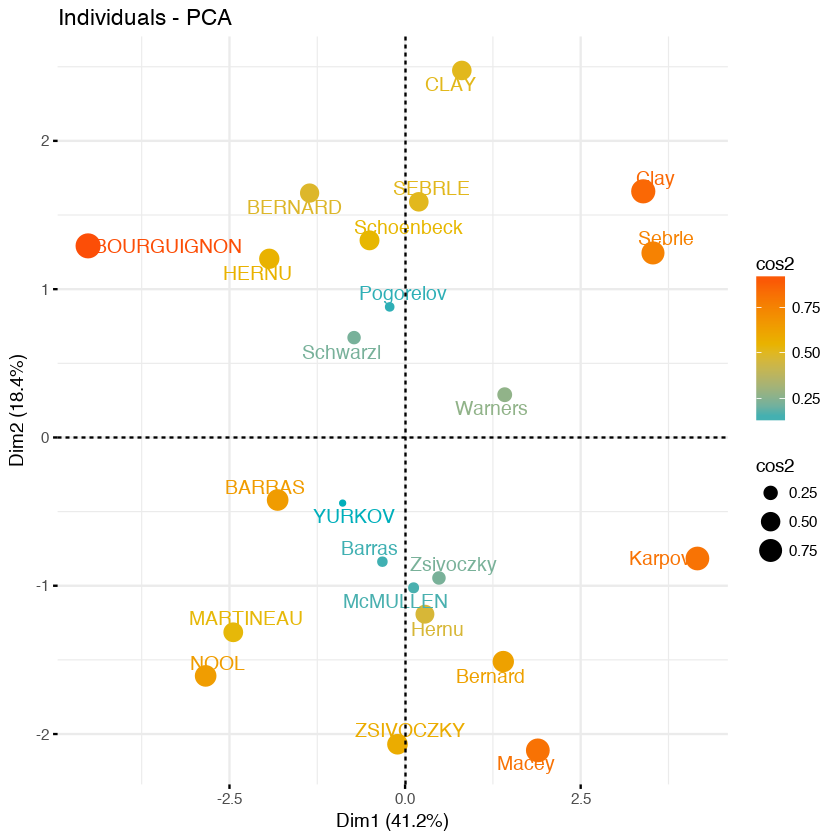

In [137]:
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

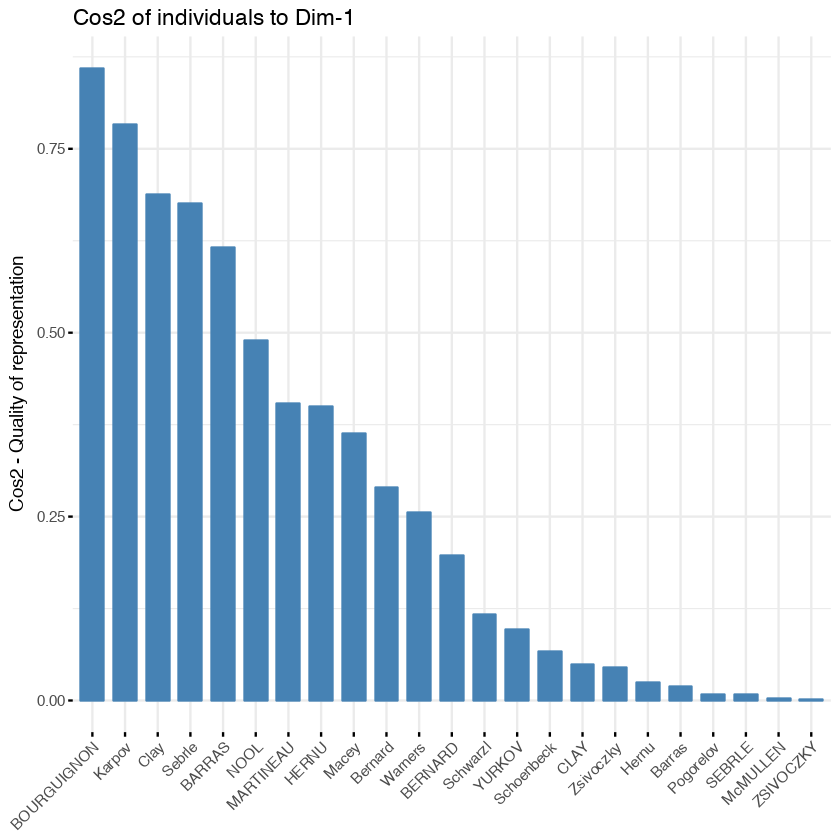

In [138]:
# 이번에는 cos2 의 바챠트 입니다. 개인별 주축에 대한 크기차이를 비교 할 수 있습니다.
fviz_cos2(res.pca, choice = "ind")

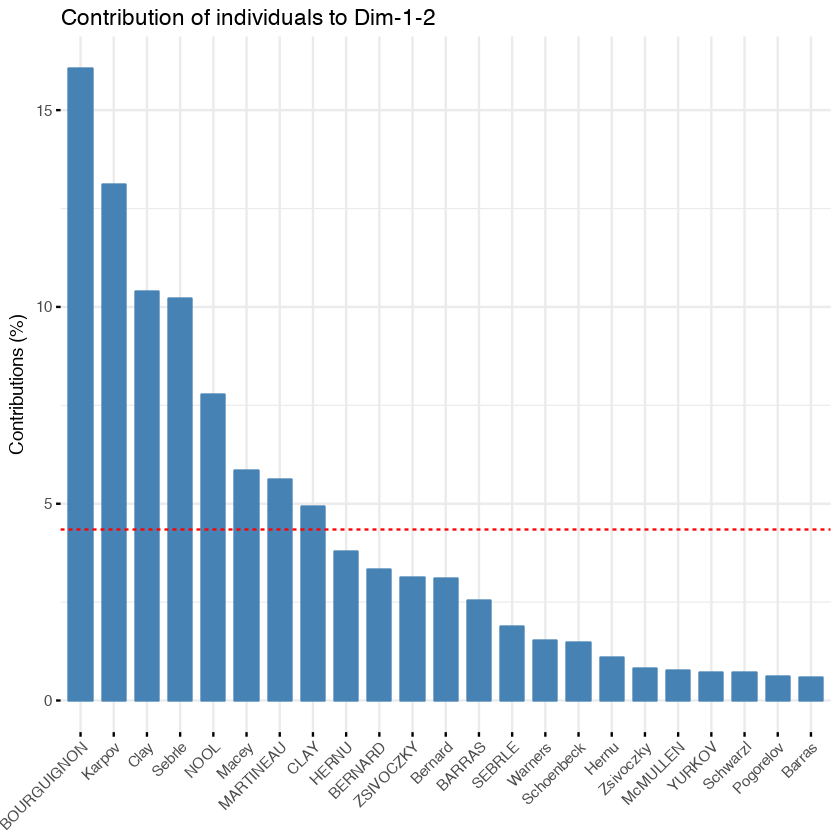

In [139]:
# 주축 1, 2 에 대한 합을 그리면 다음과 같습니다.
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2)

### 개인 그룹별 색깔 정하기

* 10종 경기에선, 개별 구룹이 정해진것이 너무 단순해서 유명한 분꽃분류 데이터로 설명하고자 합니다. iris. 또한 신뢰타원과 집중타원을 추가하는 것에 대해서 설명합니다.

iris 데이터는 다음과 같습니다. 이것은 기본으로 딸려 옵니다. 참고로 iris 는 잎의 길이, 받침 크기, 잎의 넓이에 따라서 3종류로 분류 합니다.

In [140]:
head(iris, 3)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa


In [141]:
# PCA 분석을 해보면
# The variable Species (index = 5) is removed
# before PCA analysis
iris.pca <- PCA(iris[,-5], graph = FALSE)

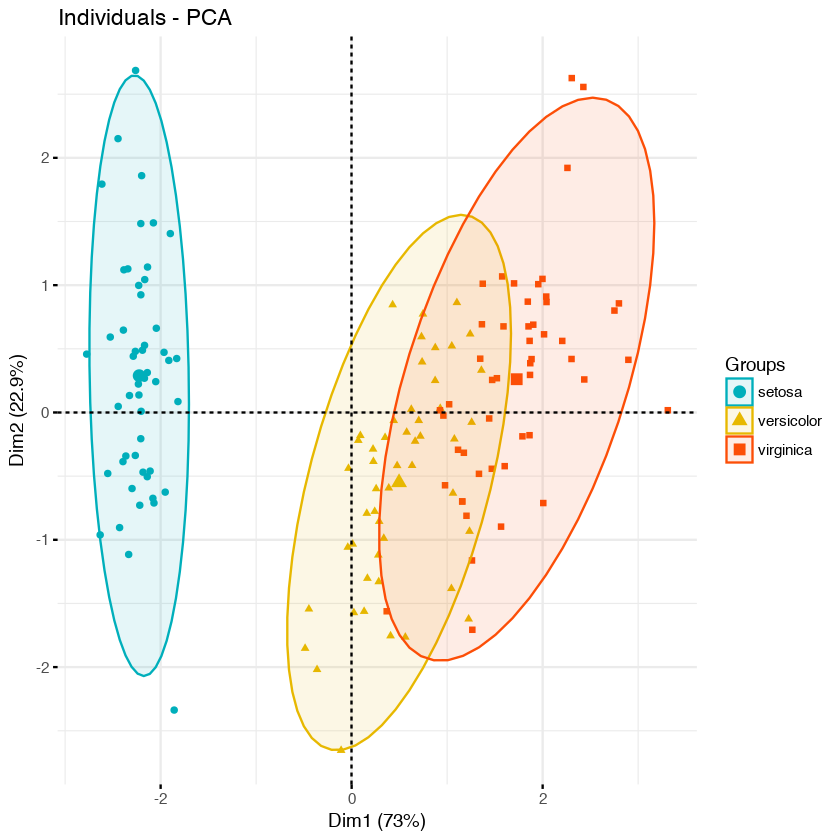

In [142]:
# 집중타원을 추가하여 pca 를 표시해봅니다.
fviz_pca_ind(iris.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups"
             )

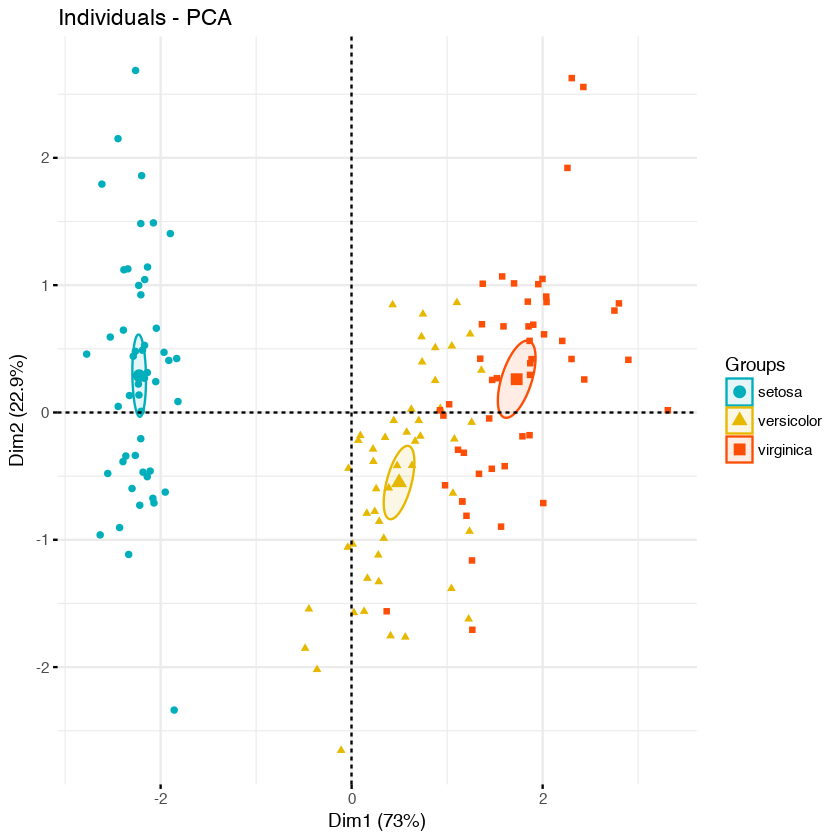

In [143]:
# 신뢰타원을 표시 할 경우에는 다음과 같습니다.
# Add confidence ellipses
fviz_pca_ind(iris.pca, geom.ind = "point", col.ind = iris$Species, 
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )

주축 차원설명


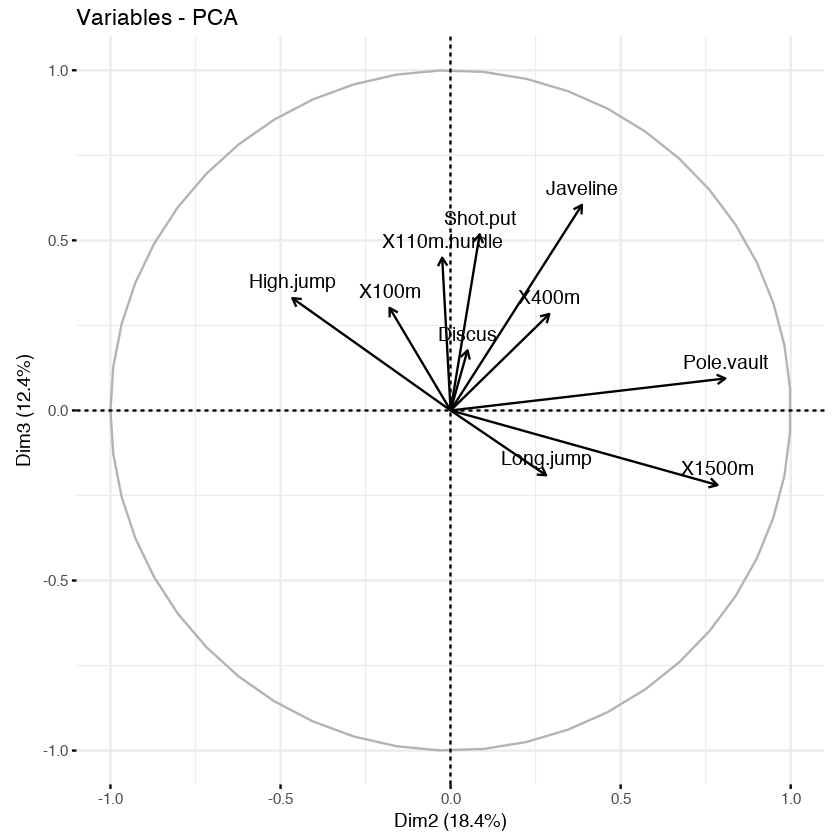

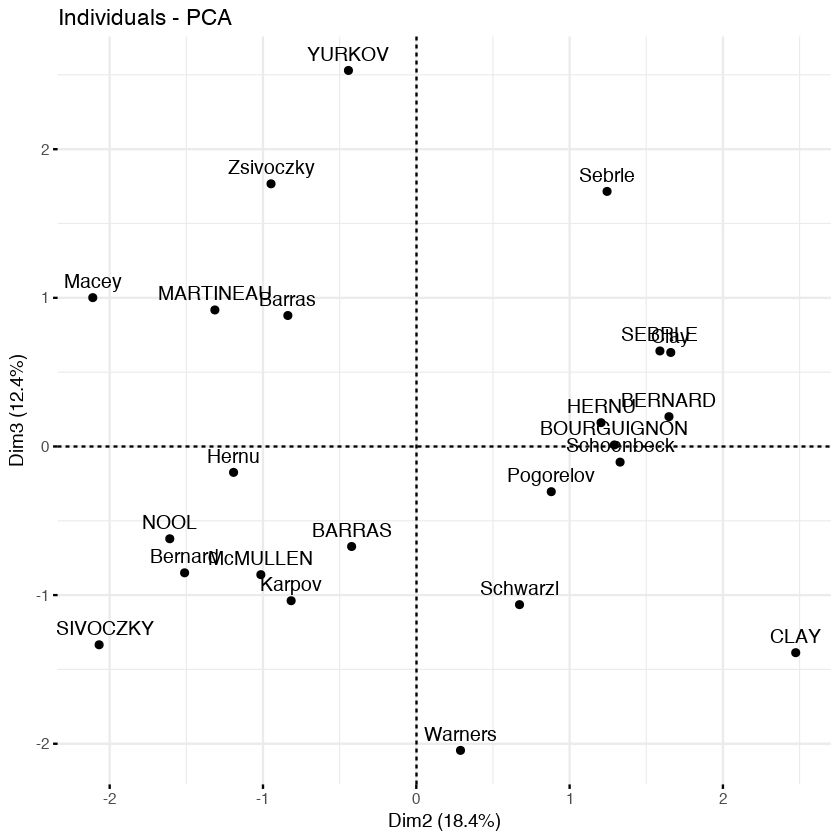

In [144]:
# 10종 경기에서 주축이 2,3 번을 표현한다면 다음과 같습니다.
# Variables on dimensions 2 and 3
fviz_pca_var(res.pca, axes = c(2, 3))
# Individuals on dimensions 2 and 3
fviz_pca_ind(res.pca, axes = c(2, 3))

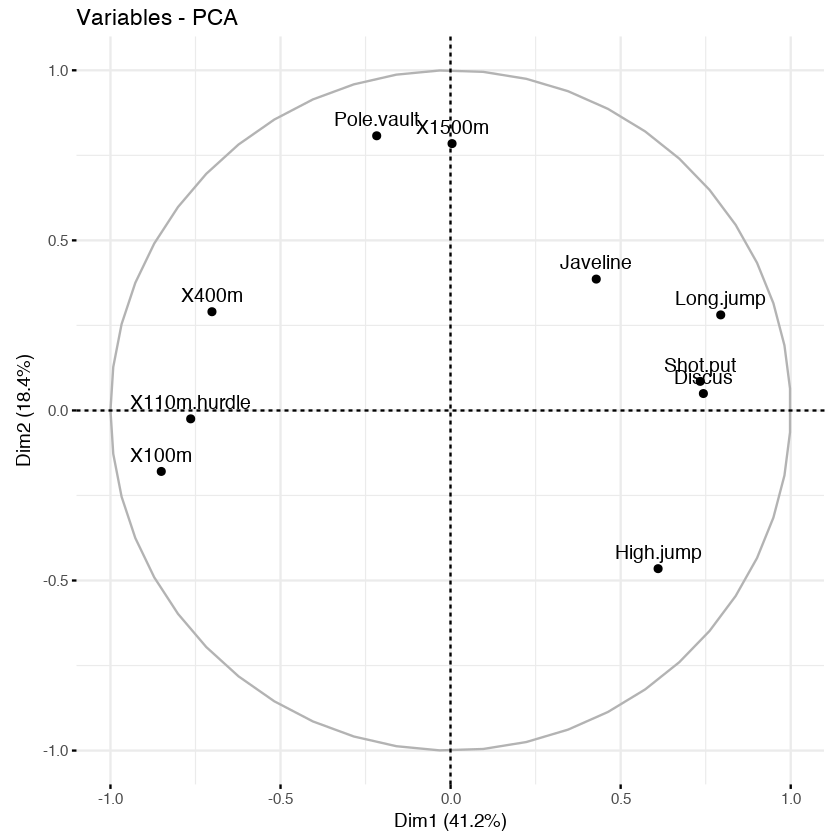

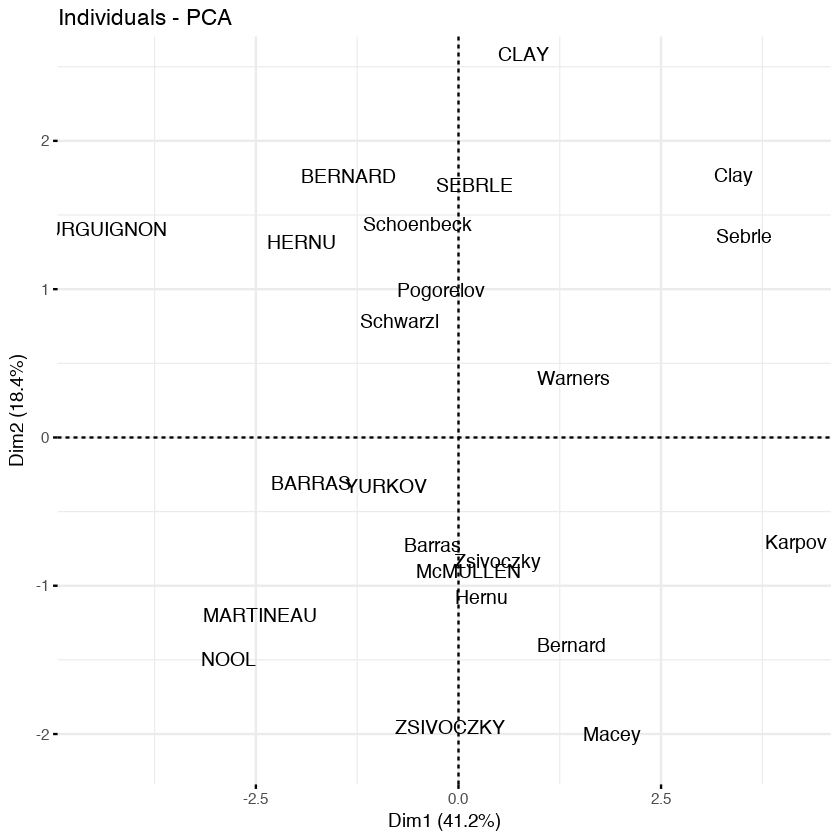

In [145]:
# 매개변수 geom 으로 표시하고자 하는 변수를 표시합니다.
# Show variable points and text labels
fviz_pca_var(res.pca, geom.var = c("point", "text"))

# Show individuals text labels only
fviz_pca_ind(res.pca, geom.ind =  "text")

타원의 모양을 조정 할 경우에는 다음처럼 합니다.

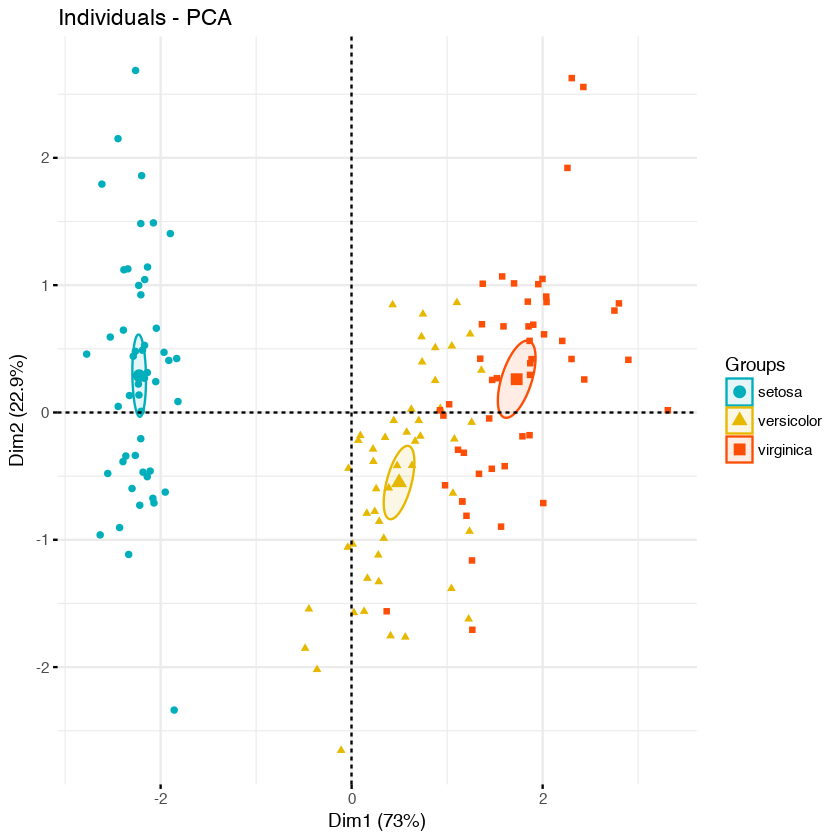

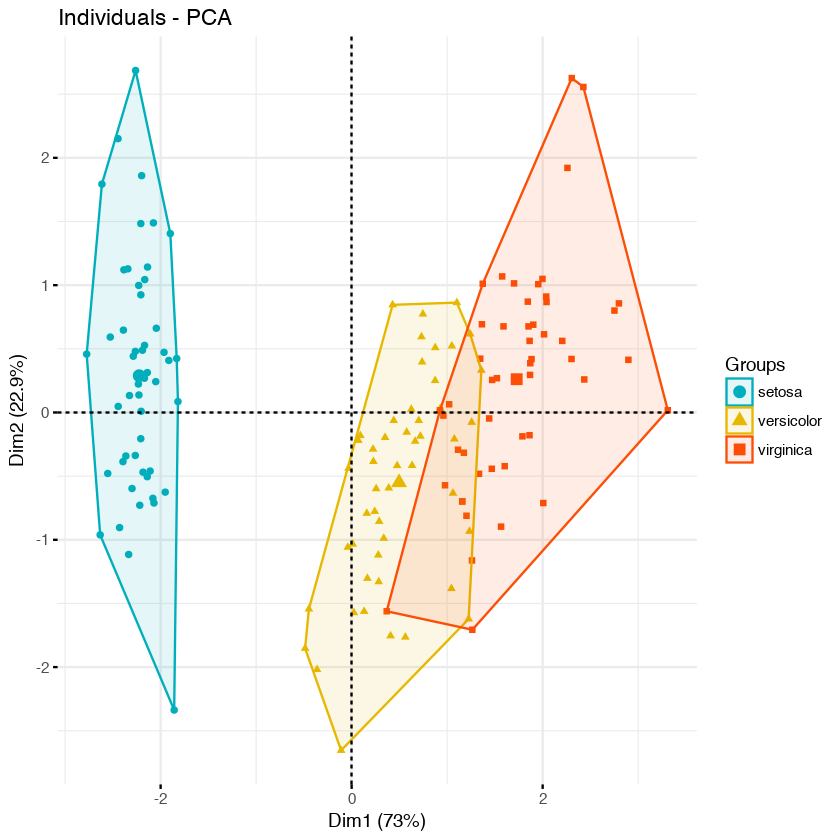

In [146]:
# Add confidence ellipses
fviz_pca_ind(iris.pca, geom.ind = "point", 
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "confidence",
             legend.title = "Groups"
             )
# Convex hull
fviz_pca_ind(iris.pca, geom.ind = "point",
             col.ind = iris$Species, # color by groups
             palette = c("#00AFBB", "#E7B800", "#FC4E07"),
             addEllipses = TRUE, ellipse.type = "convex",
             legend.title = "Groups"
             )

### Biplot 행렬도


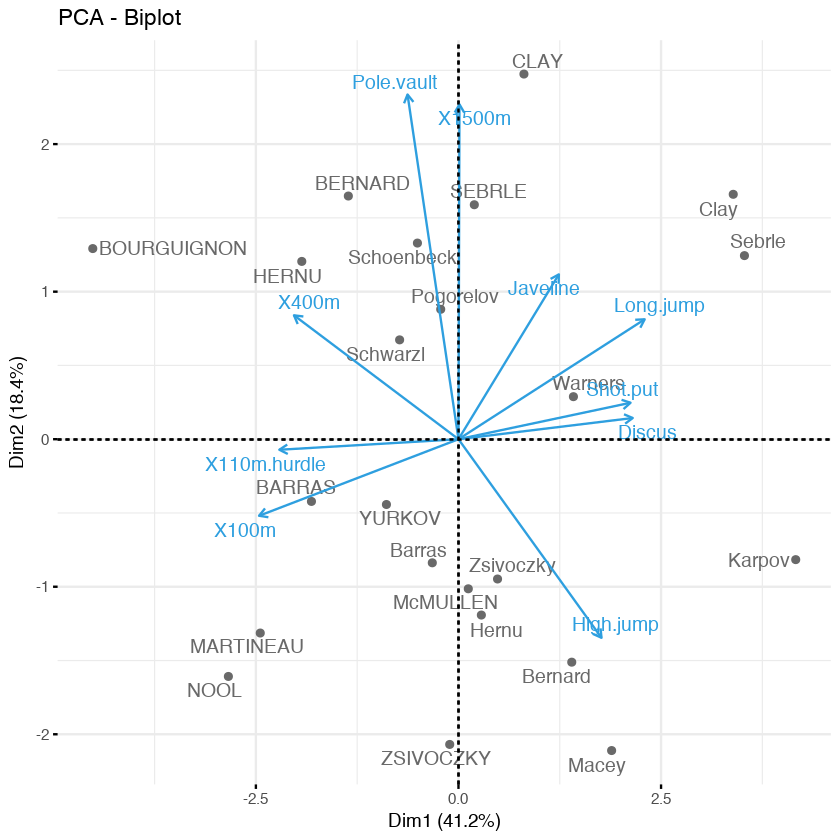

In [147]:
fviz_pca_biplot(res.pca, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
                )

* iris.pca 에 대해서 행렬도 biplot 를 표현 해보자.
* 개별과 변수 의 biplot 
* 그룹 iris\$Species 별로 색깔지정
* label 은 variable 별로 또는 geom.ind = "point" 로 지정해보자.

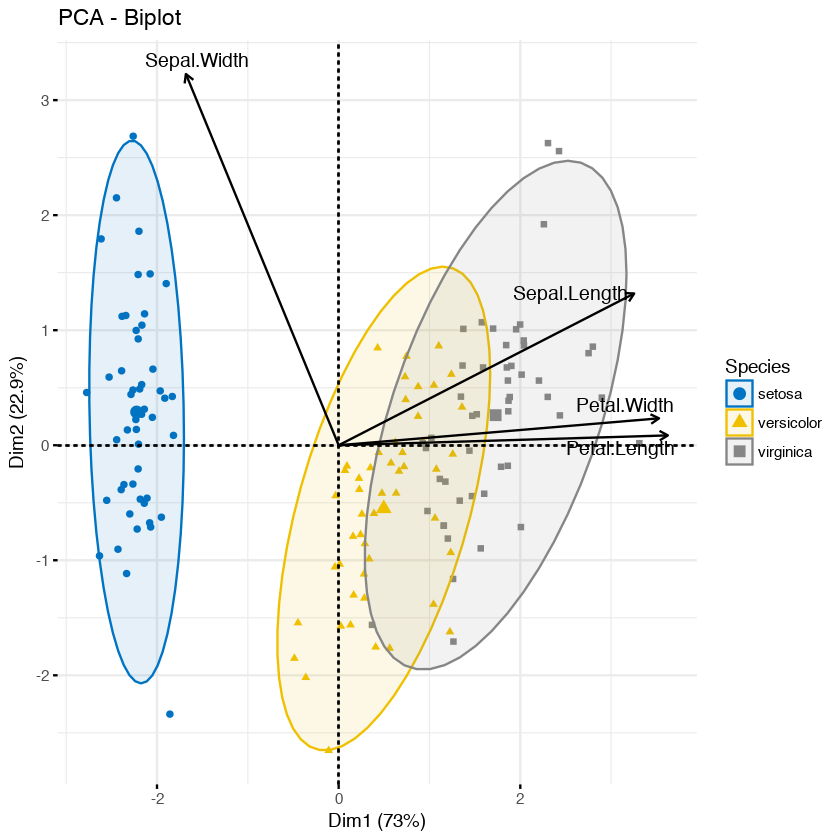

In [148]:
fviz_pca_biplot(iris.pca, 
                col.ind = iris$Species, palette = "jco", 
                addEllipses = TRUE, label = "var",
                col.var = "black", repel = TRUE,
                legend.title = "Species") 

### Suplementary elements 추가 요소들

#### 정의 및 타입


In [149]:
str(decathlon2)

'data.frame':	27 obs. of  13 variables:
 $ X100m       : num  11 10.8 11 11.3 11.1 ...
 $ Long.jump   : num  7.58 7.4 7.23 7.09 7.3 7.31 6.81 7.56 6.97 7.27 ...
 $ Shot.put    : num  14.8 14.3 14.2 15.2 13.5 ...
 $ High.jump   : num  2.07 1.86 1.92 2.1 2.01 2.13 1.95 1.86 1.95 1.98 ...
 $ X400m       : num  49.8 49.4 48.9 50.4 48.6 ...
 $ X110m.hurdle: num  14.7 14.1 15 15.3 14.2 ...
 $ Discus      : num  43.8 50.7 40.9 46.3 45.7 ...
 $ Pole.vault  : num  5.02 4.92 5.32 4.72 4.42 4.42 4.92 4.82 4.72 4.62 ...
 $ Javeline    : num  63.2 60.1 62.8 63.4 55.4 ...
 $ X1500m      : num  292 302 280 276 268 ...
 $ Rank        : int  1 2 4 5 7 8 9 10 11 12 ...
 $ Points      : int  8217 8122 8067 8036 8004 7995 7802 7733 7708 7651 ...
 $ Competition : Factor w/ 2 levels "Decastar","OlympicG": 1 1 1 1 1 1 1 1 1 1 ...


데이터는 2004년 올림픽과 2004년 Decastar 의 27명 선수 기록입니다.
* row 1:23  까지 자료를 PCA 분석을 하는데 사용할 것입니다.
* row 24:27 자료는 PCA 분석으로 얻어진 자료를 이용하여 예측하는데 사용할 예정입니다.
* col 1:10  PCA 분석으로 사용
* col 11:12 포인트와 순위 기록은 예측에 사용 할 것입니다.


* decathlon2 는 보조 연속형 변수 (quanti.sup 11:12) 와 보조 범주형 변수 (quali.sup 13) 과 보조형 개별 (ind.sup 24:27) 를 포함합니다.
* 이런 변수는 PCA 를 결정하는 데 사용하지 않지만

PCA() 함수 는 보조 변수들을 정의 할 할 있습니다  

PCA(X, ind.sup = NULL,   
    quanti.sup = NULL, quali.sup = NULL, graph = TRUE)  


* X : a data frame. Rows are individuals and columns are numeric variables.
* ind.sup : a numeric vector specifying the indexes of the supplementary individuals
* quanti.sup, quali.sup : a numeric vector specifying, respectively, the indexes of the quantitative and qualitative variables
* graph : 그래프 표시여부


In [167]:
# 11,12, 13 값을 보면
decathlon2[,c(11,12, 13)]

,Rank,Points,Competition
SEBRLE,1,8217,Decastar
CLAY,2,8122,Decastar
BERNARD,4,8067,Decastar
YURKOV,5,8036,Decastar
ZSIVOCZKY,7,8004,Decastar
McMULLEN,8,7995,Decastar
MARTINEAU,9,7802,Decastar
HERNU,10,7733,Decastar
BARRAS,11,7708,Decastar
NOOL,12,7651,Decastar


In [168]:
res_s.pca <- PCA(decathlon2, ind.sup = 24:27, 
               quanti.sup = 11:12, quali.sup = 13, graph=FALSE)

##### 연속형 변수들
* 보조 연속형 변수에 대한 결과는 res_s$quanti.sup 로 표시 됩니다. (이들 변수는 coordinates, correlation cos2 등이다.)

In [169]:
res_s.pca$quanti.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.7014777,-0.24519443,-0.1834294,0.05575186,-0.07382647
Points,0.9637075,0.07768262,0.1580225,-0.16623092,-0.03114711
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,-0.7014777,-0.24519443,-0.1834294,0.05575186,-0.07382647
Points,0.9637075,0.07768262,0.1580225,-0.16623092,-0.03114711
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Rank,0.4920710,0.060120310,0.03364635,0.00310827,0.0054503477
Points,0.9287322,0.006034589,0.02497110,0.02763272,0.0009701427


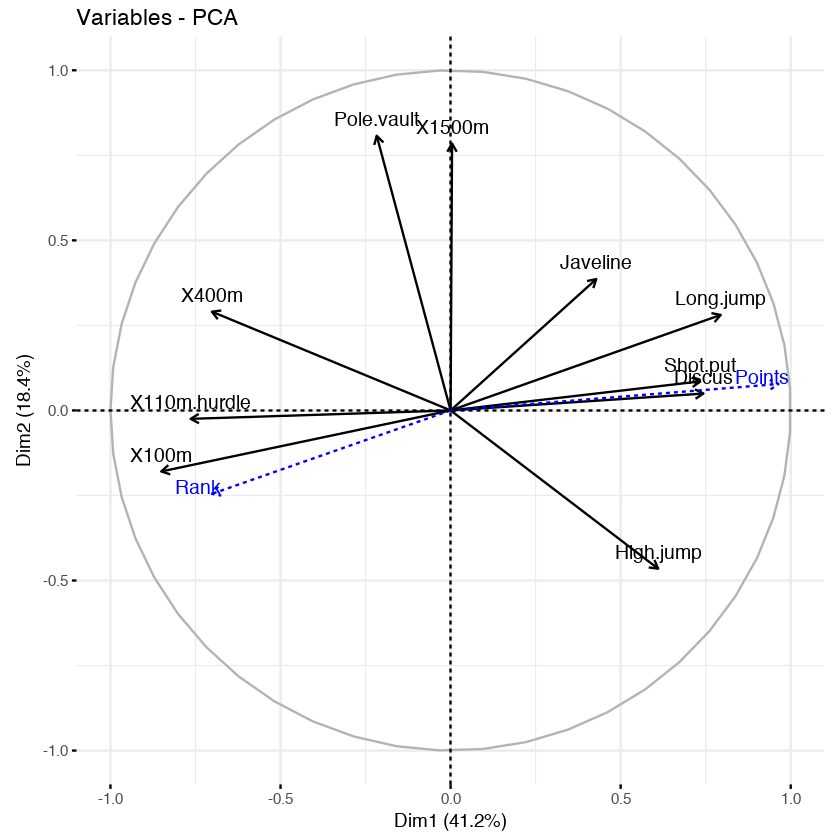

In [170]:
# 모든 변수들을 그래프로 표현 하면 다음과 같다.
fviz_pca_var(res_s.pca)

보조 연속형 변수는 푸른색으로 표시 됩니다.

#### 개별 요소 Induviduals

In [171]:
res_s.pca$ind.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.7947206,0.77951227,-1.6330203,1.7242283,-0.75070396
WARNERS,-0.3864645,-0.12159237,-1.7387332,-0.7063341,-0.03230011
Nool,-0.5591306,1.97748871,-0.4830358,-2.2784526,-0.25461493
Drews,-1.1092038,0.01741477,-3.0488182,-1.5343468,-0.32642192
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
KARPOV,0.05104677,4.911173e-02,0.21553730,0.24028620,0.0455487744
WARNERS,0.02422707,2.398250e-03,0.49039677,0.08092862,0.0001692349
Nool,0.02897149,3.623868e-01,0.02162236,0.48108780,0.0060077529
Drews,0.09207094,2.269527e-05,0.69560547,0.17617609,0.0079736753


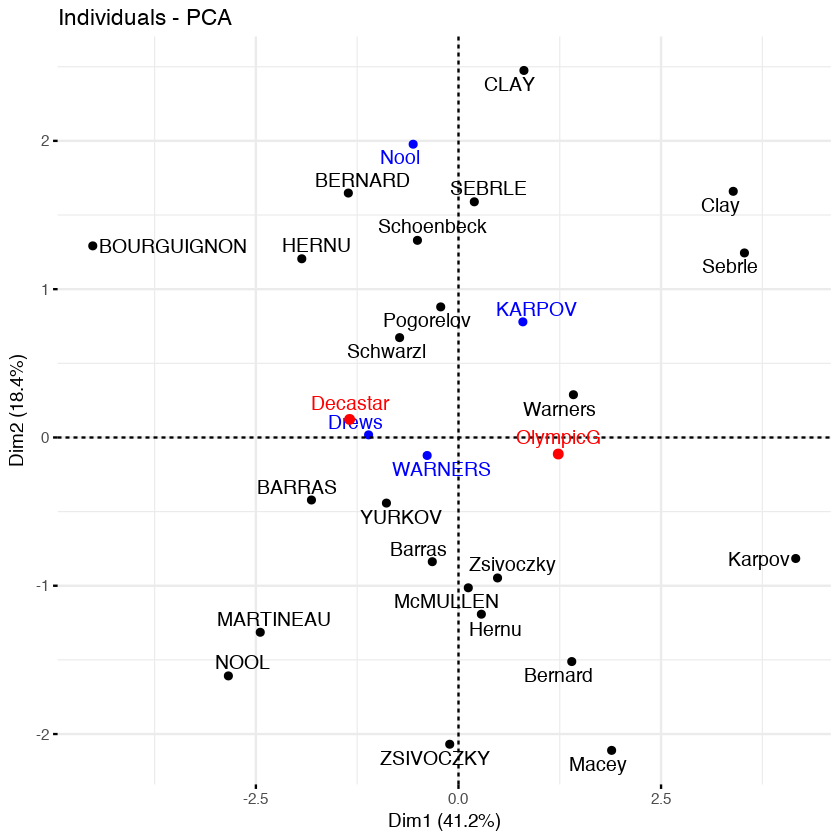

In [174]:
# active 변수와 보조 개별을 다 포함하여 그래프를 그리면.
p <- fviz_pca_ind(res_s.pca, col.ind.sup = "blue", repel = TRUE)
p <- fviz_add(p, res_s.pca$quali.sup$coord, color = "red")
p

범주형 변수 표시

In [175]:
res_s.pca$quali.sup

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-1.343451,0.1218097,-0.03789524,0.1808357,0.1343364
OlympicG,1.231497,-0.1116589,0.03473730,-0.1657661,-0.1231417
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,0.9051233,0.007440939,0.0007201669,0.01639956,0.009050062
OlympicG,0.9051233,0.007440939,0.0007201669,0.01639956,0.009050062
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Decastar,-2.970766,0.4034256,-0.1528767,0.8971036,0.7202457
OlympicG,2.970766,-0.4034256,0.1528767,-0.8971036,-0.7202457
,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
Competition,0.4011568,0.00739783,0.001062332,0.03658159,0.02357972


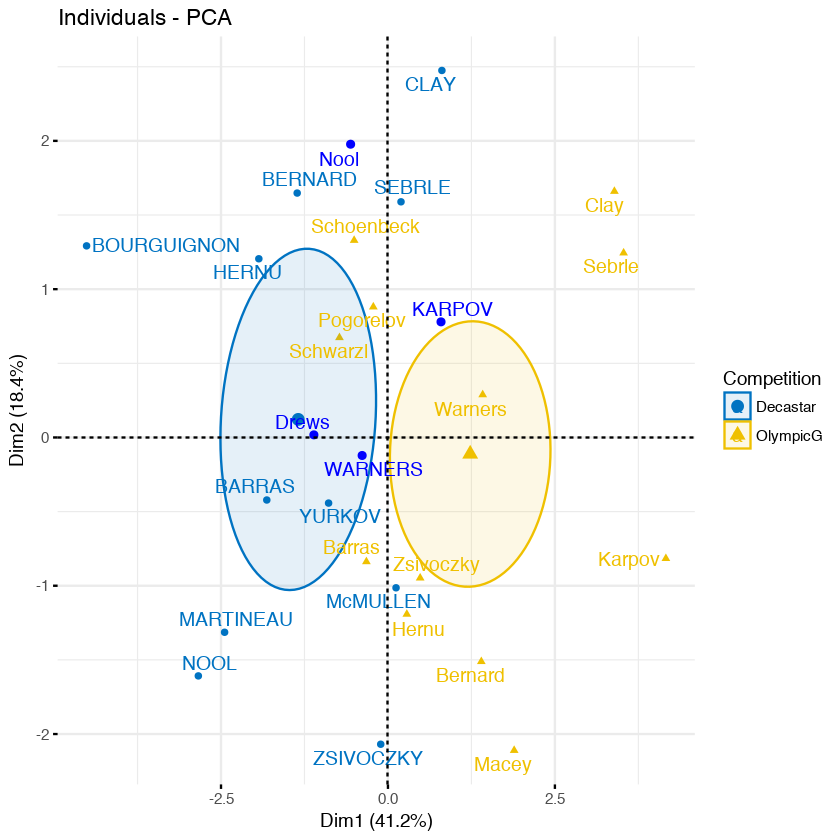

In [179]:
# 경기 대회를 범주형 변수로 하면 iris 처럼 구분하여 타원으로 표시 할 수 있습니다.
fviz_pca_ind(res_s.pca, habillage = 13,
             addEllipses =TRUE, 
             ellipse.type = "confidence",
             palette = "jco", repel = TRUE) 

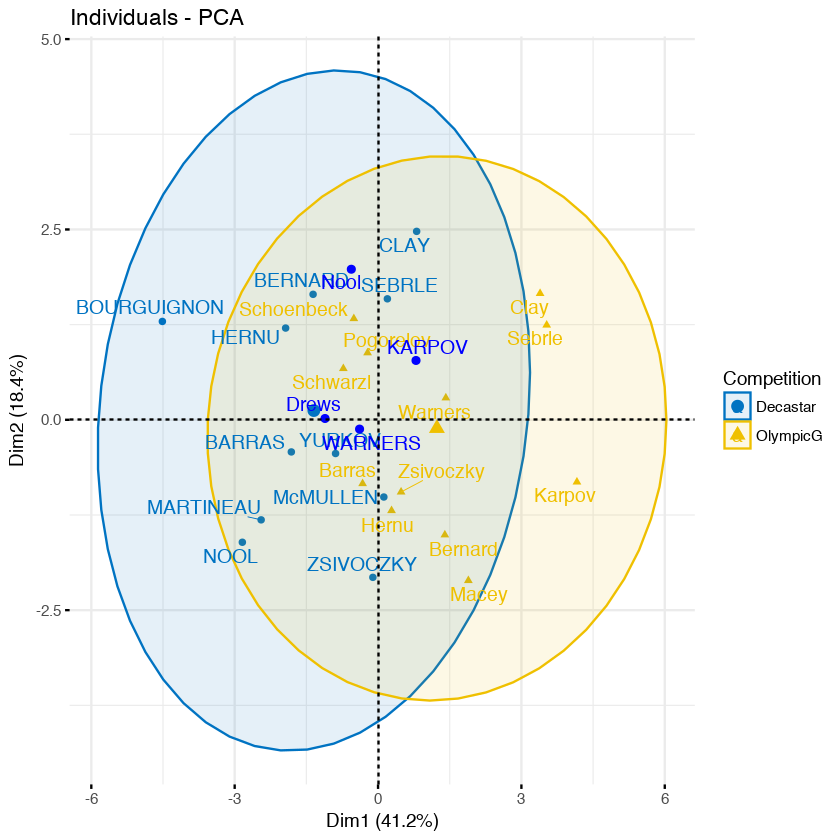

In [180]:
# 타워 타입을 confidence 로 하면 각 대회에 각자 참여한 선수들만 표시 될 것입니다. 이것을 concentration 으로 표시 하면 다음과 같습니다.
fviz_pca_ind(res_s.pca, habillage = 13,
             addEllipses =TRUE, 
        #     ellipse.type = "confidence",
             palette = "jco", repel = TRUE) 